<h1> A Tale of Two Cities</h1>
<i> Comparison of Tipping Behavior in New York and Chicago Taxi Rides</i>
<h4> Group Members:</h4> 
    
- Swathi Bhat
- Jocelyn Ambrocio

## Executive Summary 

<p> This project sought data-driven insights on tipping behaviour in New York and Chicago on two festive periods: Christmas and New Year's. The project focused on the relationship between tipping and factors such as distance of travel and time of the day, that were independent of a driver's traits, with the aim of deriving insights that were transferable across the transportation sector where tipping was involved.</p> 
<p> We extracted our datasets from a larger public database maintained by the City of New York and Chicago.</p> 
<p> Our methodology involved data wrangling and pre-processing, applying visualisation to display patterns and applying linear regression to derive an equation.</p> 
<p> The data revealed interesting insights: The tip (relative to the fare) decreases as a passenger travels further in the taxi, across both the cities. A higher percentage of tips is given between evening to midnight in New York and Chicago. It was noticeable that majority of Chicago riders did not give any tip at all especially during the early part of the day. New Year's is a better period for tipping than Christmas in both cities.</p>

## Problem Statement and Datasets

<h4><b><u>Research Topic</b></u></h4>

<p>The project is based on the transportation industry, with a specific focus on tipping behavior in taxi rides in New York and Chicago on two specific days in 2018: Christmas and New Year’s. </p>


<p> Tipping is a social norm in many countries. In certain industries such as hospitality and food & beverage, tipping tends to be an expectation and not simply a customer's choice. Notably, in several countries, tipping is also expected at the end of a taxi trip. In the United States, <a href = "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5464625/">the norm of tipping taxi drivers is between 15 and 20 percent</a>, with tipping representing a significant portion of the informal economy. </p>

<p> In this project, we are not exploring patterns influencing tipping that are dependent on driver's personality traits such as affability. Instead, we are interested in specifically studying factors that are independent of such traits. Examples include: the distance travelled and pick-up timing. Understanding, and subsequently predicting, tipping behaviour modelled on such factors may assist taxi drivers in making better decisions about the characteristics of a ride that may yield a better tip. By understanding tipping behaviour influenced by factors that are driver-independent, this analysis is applicable not only to taxi drivers but drivers of other ride-sharing services such as GoJek and Grab.</p>


<p>The following questions will be explored by applying data analytics:</p>
    
- 1.1 Whether the tip amount increases with trip distance.
- 1.2 Whether the tip amount differs based on the pick-up time.
- 1.3 Whether people tip better on Christmas than on New Year’s.

<p>After analysing the data for each of the cities, we will compare the data across the two cities to analyse the following:</p>
    
- 2.1 By how much does tipping differ by distance in New York compared with Chicago?
- 2.2 By how much does tipping differ by pick-up time in New York compared with Chicago?
- 2.3 By how much does tipping differ by (Christmas or New Year's) day in New York compared with Chicago?

<h4><b><u>Selected Datasets</b><u></h4>

<p>We picked a dataset containing taxi trips taken from 24 - 25 December 2018 and 31 December 2018 to 1 January 2019. The data was extracted from a bigger dataset that was reported to regulatory authorities in New York and Chicago. Datasets in CSV fromat were available on public databases maintained by the <a href="https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p"> City of Chicago</a> and the <a href="https://data.cityofnewyork.us/Transportation/2018-Yellow-Taxi-Trip-Data/t29m-gskq">City of New York</a>.  The relevant datasets were retrieved from the websites using their filter and export function.</p> 
    <p>The features of the dataset are as follows:</p> 

<table>
    <tr>
        <th>Information</th>
        <th>New York</th>
        <th>Chicago</th>
    </tr>
    <tr>
        <td>Number of variables</td>
        <td>17</td>
        <td>21</td>
    </tr>
    <tr>
        <td>Number of datapoints</td>
        <td>520,638</td>
        <td>683,793</td>
    </tr>
        <tr>
        <td>Variables</td>
        <td>VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount</td>
        <td>Trip ID, Trip Start Timestamp, Trip End Timestamp, Trip Seconds, Trip Miles, Pickup Census Tract, Dropoff Census Tract, Pickup Community Area, Dropoff Community Area, Fare, Tip, Additional Charges, Trip Total, Shared Trip Authorized, Trips Pooled, Pickup Centroid Latitude, Pickup Centroid Longitude, Pickup Centroid Location, Dropoff Centroid Latitude, Dropoff Centroid Longitude, Dropoff Centroid Location</td>
    </tr>
</table>

<p>These two datasets were selected because of the availability of the massive number of datapoints enabling a rigorous statistical analysis.</p> 

<p> Our datasets are downloadable from this Google Drive link <a href ="https://drive.google.com/drive/folders/1PyKpRTGw3Hd2GbeOVRahwTclM201Bn8b?usp=sharing">here.</a></p>

## Methodology 

The following steps were employed in analysing both New York and Chicago datasets:
- Step 1: Data Cleaning 
- Step 2: Deletion of Irrelevant Variables / Addition of Relevant Variables
- Step 3: Exploratory Data Analysis (descriptive analysis and visualisation tools)
- Step 4: Machine learning using Simple Linear Regression

## <u>New York City & Chicago</u> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
import time 
from datetime import datetime

### Step 1: Reading and cleaning the dataset

In [29]:
nyc_df = pd.read_csv('NYC_Taxi_Trips.csv')
chicago_df = pd.read_csv('Chicago_Taxi_2018.csv')
# testing 
# print('NYC', nyc_df.shape)
# print('Chicago', chicago_df.shape)
# #  chicago_df.head(1))

In [30]:
# check null values
cities_df = [nyc_df, chicago_df]
missing_counts = []
for item in cities_df:
    counts = item.isnull().sum()
    missing_counts.append(pd.Series(counts))
# missing_counts

In [31]:
# remove null values 
for i in cities_df:
    i.dropna(inplace= True)
    i.reset_index(drop=True)
# # testing
# cities_df[1].head()

In [32]:
# checking for relevant columns 
# nyc_col_list = list(nyc_df.columns)
# chicago_col_list = list(chicago_df.columns)
 
# testing 
# print(nyc_col_list)
# print(chicago_col_list)

# dropping irrelevant columns 
nyc_df.drop(columns=['VendorID','passenger_count', 'RatecodeID', 'store_and_fwd_flag','extra', 'mta_tax','tolls_amount',
                     'improvement_surcharge'], inplace=True)
chicago_df.drop(columns=['Trip ID','Pickup Census Tract', 'Dropoff Census Tract', 'Additional Charges',
                         'Shared Trip Authorized','Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude', 
                         'Pickup Centroid Location', 'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
                         'Dropoff Centroid Location'], inplace=True)
# testing 
# nyc_df.head(1)
# chicago_df.head(1)

In [33]:
### RENAMING COLUMNS FOR CONSISTENCY 
# inspecting column-order
cities_col_list =[]
for item in cities_df:
    list_item = list(item.columns)
    cities_col_list.append(list_item)
cities_col_list
# print(cities_col_list[0])
# print(cities_col_list[1])

[['tpep_pickup_datetime',
  'tpep_dropoff_datetime',
  'trip_distance',
  'PULocationID',
  'DOLocationID',
  'payment_type',
  'fare_amount',
  'tip_amount',
  'total_amount'],
 ['Trip Start Timestamp',
  'Trip End Timestamp',
  'Trip Seconds',
  'Trip Miles',
  'Pickup Community Area',
  'Dropoff Community Area',
  'Fare',
  'Tip',
  'Trip Total']]

In [34]:
# list of renamed columns for each city
nyc_col = ['pu_time', 'do_time', 'trip_distance', 'pu_loc', 'do_loc', 'payment_type', 'fare', 'tip', 'total_amount']
chic_col = ['pu_time', 'do_time', 'trip_duration', 'trip_distance', 'pu_loc', 'do_loc', 'fare', 'tip', 'total_amount']
new_col = [nyc_col, chic_col]
# testing 
# print(len(cities_col_list[0]) == len(nyc_col))
# print(len(cities_col_list[1]) == len(chic_col))

# function to rename columns 
def column_renamer(a):
    for n in range(0, len(cities_col_list[a])):
        cities_df[a].rename(columns={cities_col_list[a][n] : new_col[a][n]}, inplace=True)
    return cities_df[a]

In [35]:
rel_nyc_df = column_renamer(0)
rel_chic_df = column_renamer(1)
rel_cities_df = [rel_nyc_df, rel_chic_df]
# testing 
rel_nyc_df.head(1)
rel_chic_df.head(1)

,pu_time,do_time,trip_duration,trip_distance,pu_loc,do_loc,fare,tip,total_amount
0,01/01/2019 02:15:00 AM,01/01/2019 02:15:00 AM,591,0.5,8.0,8.0,5.0,0,7.5


In [37]:
# Converting timestamps to seconds
def time_converter(x):
    new_x =  pd.to_datetime(x)
    return datetime.timestamp(new_x)

for item in rel_cities_df:
    item['pu_time_s'] = item['pu_time'].apply(time_converter)
    item['do_time_s'] = item['do_time'].apply(time_converter)
print(len(rel_cities_df))
print(rel_cities_df[1].head(1))

# relevant_nyc_df.head()

2
                  pu_time                 do_time  trip_duration  \
0  01/01/2019 02:15:00 AM  01/01/2019 02:15:00 AM            591   

   trip_distance  pu_loc  do_loc  fare  tip  total_amount     pu_time_s  \
0            0.5     8.0     8.0   5.0    0           7.5  1.546280e+09   

      do_time_s  
0  1.546280e+09  


In [115]:
rel_cities_df[0]['trip_duration'] = rel_cities_df[0]['do_time_s'] - rel_cities_df[0]['pu_time_s']
rel_cities_df[0].to_csv('rel_nyc_df')
rel_cities_df[1].to_csv('rel_chic_df')

In [2]:
### CHECKPOINT: Retrieve cleaned data from these csvs
nyc_df = pd.read_csv('rel_nyc_df')
chic_df = pd.read_csv('rel_chic_df')
rel_cities_df =[nyc_df, chic_df]

In [3]:
### function to remove irrelevant results 
for n in range(0,2):
    # removing trips with duration less than 60 seconds
    time_cond = rel_cities_df[n]['trip_duration'] >= 60
    # removing trips that travelled no distance 
    dist_cond = rel_cities_df[n]['trip_distance'] > 0
    # removing trips with no fares 
    fare_cond = rel_cities_df[n]['fare'] > 0 
    # removing trips with negative tip amount
    tip_cond = rel_cities_df[n]['tip'] >=0
    # applying the conditions 
    item = rel_cities_df[n].loc[time_cond & dist_cond & fare_cond & tip_cond]
    rel_cities_df.append(item)
# testing 
print(len(rel_cities_df))

4


In [4]:
def tester(list_):
    for item in list_:
        print(item.columns)
        print('Shape of df is: ', item.shape )
# tester(rel_cities_df)

In [5]:
cities_df = rel_cities_df[2:]

In [6]:
# extracting only the festive day 
def day_identity(date):
    if ('01/01/2019' in date) or ('12/31/2018' in date) or ('01/02/2019' in date):
        return 'New Year'
    else:
        return 'Christmas'
    
# applying to pickup and dropoff datetime
for n in range(0,2):
    cities_df[n]['trip_day'] = cities_df[n]['pu_time'].apply(day_identity)

# testing 
tester(cities_df)

C:\Users\Swathi Bhat\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Index(['Unnamed: 0', 'Unnamed: 0.1', 'pu_time', 'do_time', 'trip_distance',
       'pu_loc', 'do_loc', 'payment_type', 'fare', 'tip', 'total_amount',
       'pu_time_s', 'do_time_s', 'trip_duration', 'trip_day'],
      dtype='object')
Shape of df is:  (513735, 15)
Index(['Unnamed: 0', 'Unnamed: 0.1', 'pu_time', 'do_time', 'trip_duration',
       'trip_distance', 'pu_loc', 'do_loc', 'fare', 'tip', 'total_amount',
       'pu_time_s', 'do_time_s', 'trip_day'],
      dtype='object')
Shape of df is:  (369627, 14)


In [7]:
# splitting dfs into xmas and new year's
xmas = []
ny = []
for item in cities_df:
    xmas_df = item.loc[item['trip_day']=='Christmas']
    ny_df = item.loc[item['trip_day']=='New Year']
    xmas.append(xmas_df)
    ny.append(ny_df)
# testing
# print(xmas[0].shape)

In [8]:
# grouping timings into 4-hour categories 
timestamp_xmas_list = ['12/24/2018 12:00:00 AM','12/24/2018 4:00:00 AM','12/24/2018 8:00:00 AM',
                  '12/24/2018 12:00:00 PM',
                  '12/24/2018 4:00:00 PM',
                  '12/24/2018 8:00:00 PM',
                  '12/25/2018 12:00:00 AM',
                  '12/25/2018 4:00:00 AM',
                  '12/25/2018 8:00:00 AM',
                  '12/25/2018 12:00:00 PM',
                  '12/25/2018 4:00:00 PM',
                  '12/25/2018 8:00:00 PM',
                  '12/26/2018 12:00:00 AM',
                  '12/26/2018 4:00:00 AM',
                  '12/26/2018 8:00:00 AM',
                  '12/26/2018 12:00:00 PM',
                  '12/26/2018 4:00:00 PM',
                  '12/26/2018 8:00:00 PM',
                  '12/26/2018 11:59:59 PM']
timestamp_ny_list = ['12/31/2018 12:00:00 AM',
                  '12/31/2018 4:00:00 AM',
                  '12/31/2018 8:00:00 AM',
                  '12/31/2018 12:00:00 PM',
                  '12/31/2018 4:00:00 PM',
                  '12/31/2018 8:00:00 PM',
                  '01/01/2019 12:00:00 AM',
                  '01/01/2019 4:00:00 AM',
                  '01/01/2019 8:00:00 AM',
                  '01/01/2019 12:00:00 PM',
                  '01/01/2019 4:00:00 PM',
                  '01/01/2019 8:00:00 PM',
                  '01/02/2019 12:00:00 AM',
                  '01/02/2019 4:00:00 AM',
                  '01/02/2019 8:00:00 AM',
                  '01/02/2019 12:00:00 PM',
                  '01/02/2019 4:00:00 PM',
                  '01/02/2019 8:00:00 PM',
                  '01/02/2019 11:59:59 PM']
# converting into datetime 
timestamp_list = [timestamp_xmas_list, timestamp_ny_list]
time_xmas_list = []
time_ny_list = []
time_list = [time_xmas_list, time_ny_list]

for n in range(0,2):
    for item in timestamp_list[n]:
        new_item = pd.to_datetime(item)
        time_list[n].append(datetime.timestamp(new_item))
print(len(time_list))

# # function to assign time-groups 
def time_groups_xmas(t):
    n = 0
    while n < 6:
        if (time_xmas_list[n] <= t < time_xmas_list[n+1]) or (time_xmas_list[n+6] <= t < time_xmas_list[n+7]) or (time_xmas_list[n+12] <= t < time_xmas_list[n+13]):
            return n+1
        n += 1
def time_groups_ny(t):
    n = 0
    while n < 6:
        if (time_xmas_list[n] <= t < time_xmas_list[n+1]) or (time_xmas_list[n+6] <= t < time_xmas_list[n+7]) or (time_xmas_list[n+12] <= t < time_xmas_list[n+13]):
            return n+1
        n += 1

2


In [ ]:
# Grouping times on Christmas
for num in range(0,2):
    time_group = xmas[num]['pu_time_s'].apply(time_groups_xmas)
    xmas[num]['time_group'] = time_group
    time_group_ny = ny[num]['pu_time_s'].apply(time_groups_ny)
    ny[num]['time_group'] = time_group_ny
# testing 
xmas[1].head(1)
ny[0].head(1)


C:\Users\Swathi Bhat\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Swathi Bhat\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,Unnamed: 0.1,pu_time,do_time,trip_distance,pu_loc,do_loc,payment_type,fare,tip,total_amount,pu_time_s,do_time_s,trip_duration,trip_day,time_group
0,0,0,01/01/2019 02:44:59 PM,01/01/2019 09:58:48 PM,3.04,186,141,1,12.5,2.76,16.56,1.546325e+09,1.546351e+09,26029.0,New Year,None


In [ ]:
cities_df = []
for n in range(0,2):
    new_df = pd.concat([xmas[n], ny[n]], ignore_index=False)
    cities_df.append(new_df)
# testing 
# tester(cities_df)
# cities_df[0].head(1)

# removing unwanted column 
for i in cities_df:
    i.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)
tester(cities_df)

Index(['pu_time', 'do_time', 'trip_distance', 'pu_loc', 'do_loc',
       'payment_type', 'fare', 'tip', 'total_amount', 'pu_time_s', 'do_time_s',
       'trip_duration', 'trip_day', 'time_group'],
      dtype='object')
Shape of df is:  (513735, 14)
Index(['pu_time', 'do_time', 'trip_duration', 'trip_distance', 'pu_loc',
       'do_loc', 'fare', 'tip', 'total_amount', 'pu_time_s', 'do_time_s',
       'trip_day', 'time_group'],
      dtype='object')
Shape of df is:  (369627, 13)


In [ ]:
# rounding off tip amounts for visualisation 
def tip_round(tip):
    return round(tip)
for i in cities_df:
    tip_rounded = i['tip'].apply(tip_round)
    i['tip_rounded'] = tip_rounded
tester(cities_df)

Index(['pu_time', 'do_time', 'trip_distance', 'pu_loc', 'do_loc',
       'payment_type', 'fare', 'tip', 'total_amount', 'pu_time_s', 'do_time_s',
       'trip_duration', 'trip_day', 'time_group', 'tip_rounded'],
      dtype='object')
Shape of df is:  (513735, 15)
Index(['pu_time', 'do_time', 'trip_duration', 'trip_distance', 'pu_loc',
       'do_loc', 'fare', 'tip', 'total_amount', 'pu_time_s', 'do_time_s',
       'trip_day', 'time_group', 'tip_rounded'],
      dtype='object')
Shape of df is:  (369627, 14)


In [ ]:
# intervals for distance travelled
dist = []
for i in cities_df:
    dist_stat = i['trip_distance'].describe()
    dist.append(dist_stat)
# testing 
# dist[0]

def dist_int(distance):
    n = 0
    while n <=90:
        if distance <= 10 + n:
            return float(10 + n)
        n += 10
for n in range(0,2):
    cities_df[n]['dist_interval'] = cities_df[n]['trip_distance'].apply(dist_int)
    
# testing 
tester(cities_df)

Index(['pu_time', 'do_time', 'trip_distance', 'pu_loc', 'do_loc',
       'payment_type', 'fare', 'tip', 'total_amount', 'pu_time_s', 'do_time_s',
       'trip_duration', 'trip_day', 'time_group', 'tip_rounded',
       'dist_interval'],
      dtype='object')
Shape of df is:  (513735, 16)
Index(['pu_time', 'do_time', 'trip_duration', 'trip_distance', 'pu_loc',
       'do_loc', 'fare', 'tip', 'total_amount', 'pu_time_s', 'do_time_s',
       'trip_day', 'time_group', 'tip_rounded', 'dist_interval'],
      dtype='object')
Shape of df is:  (369627, 15)


In [ ]:
# saving prepared datasets as csv 
cities_df[0].to_csv('NYC.csv')
cities_df[1].to_csv('Chicago.csv')

In [2]:
csv_list = ['NYC.csv', 'Chicago.csv']
def csv_opener(list_):
    all_df = []
    for n in range(0,2):
        df = pd.read_csv(list_[n])
        all_df.append(df)
        print(all_df[n].shape)
        print(all_df[n].columns)
    return all_df

In [3]:
## CHECKPOINT 
cities_df = csv_opener(csv_list)
# testing
# tester(all_df)

(413253, 17)
Index(['Unnamed: 0', 'pu_time', 'do_time', 'trip_distance', 'pu_loc', 'do_loc',
       'payment_type', 'fare', 'tip', 'total_amount', 'pu_time_s', 'do_time_s',
       'trip_duration', 'trip_day', 'time_group', 'tip_rounded',
       'dist_interval'],
      dtype='object')
(369627, 16)
Index(['Unnamed: 0', 'pu_time', 'do_time', 'trip_duration', 'trip_distance',
       'pu_loc', 'do_loc', 'fare', 'tip', 'total_amount', 'pu_time_s',
       'do_time_s', 'trip_day', 'time_group', 'tip_rounded', 'dist_interval'],
      dtype='object')


### Step 2: Exploratory Data Analysis


In [5]:
# How many trips received tips?
tips_trips = []
for n in range(0,2): 
    tips_gb_size = cities_df[n].groupby('tip_rounded').size()
    tips_trips.append(tips_gb_size)
# testing
# print(len(tips_trips))
# print(tips_trips[1])

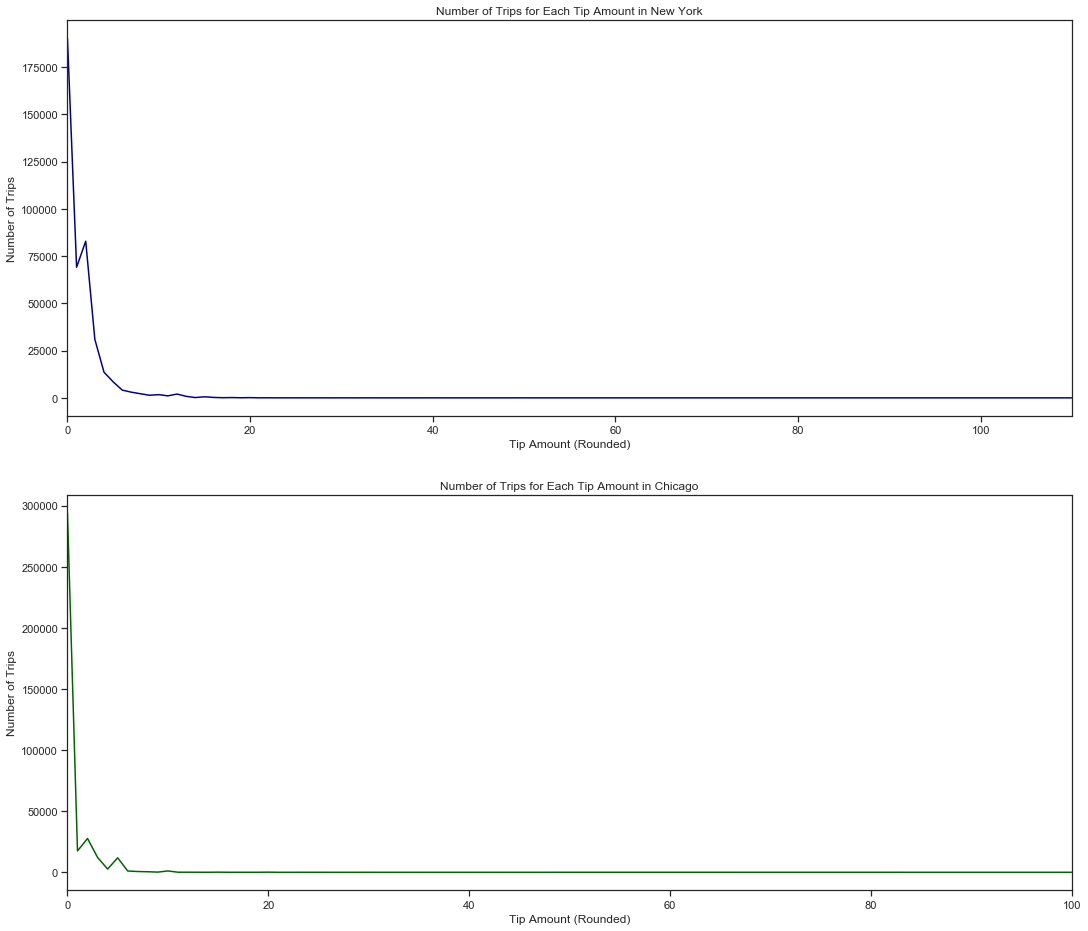

<Figure size 432x288 with 0 Axes>

In [6]:
# Visualisation 
# pd.options.display.float_format = '{:,.1f}'.format
pd.set_option('precision', 3)
colour = ['darkblue', 'darkgreen']
city_names = ['New York', 'Chicago']
sns.set(style = "ticks")
fig, axes = plt.subplots(nrows=2, 
                         ncols=1,
                         figsize = (18,16))
fig.subplots_adjust(wspace = 0.3, 
                   hspace = 0.2)
for n in range(0,2):
    tips_trips[n].plot(kind = 'line',
                      x = tips_trips[n].index,
                      y = tips_trips[n].values, 
                      ax = axes[n], 
                      color = colour[n])
    axes[n].set(title = 'Number of Trips for Each Tip Amount in '+ city_names[n],  
           xlabel = 'Tip Amount (Rounded)', 
           ylabel = 'Number of Trips')
plt.show()
plt.savefig('number_trips_tips.png')

In [8]:
# creating a tip category 
def tip_cat(tip):
    if tip == 0:
        return 'Without tip'
    else:
        return 'With tip'
for item in cities_df:
    item['tip_category'] = item['tip'].apply(tip_cat)
    # creating tip%
    tip_perc = (item['tip']/item['fare'])*100
    item['tip_perc'] = round(tip_perc)
    print(item['tip_perc'].describe())

# testing 
# tester(cities_df)


count    413253.000
mean         13.191
std          16.301
min           0.000
25%           0.000
50%          13.000
75%          23.000
max        2250.000
Name: tip_perc, dtype: float64
count    369627.000
mean          7.319
std          20.023
min           0.000
25%           0.000
50%           0.000
75%           0.000
max         600.000
Name: tip_perc, dtype: float64


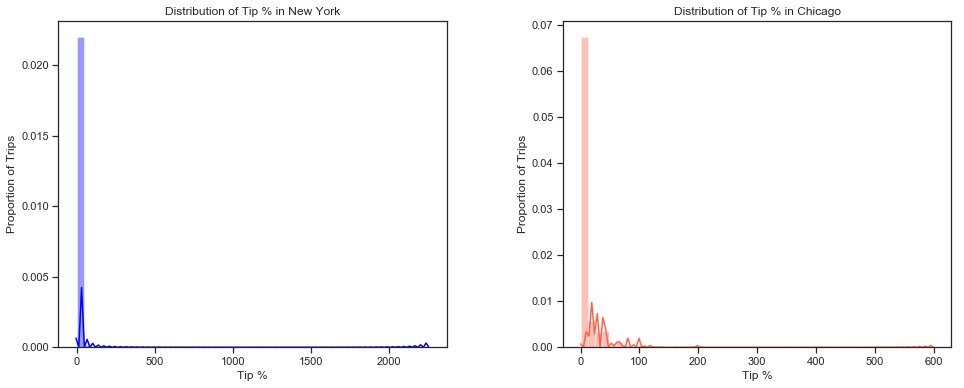

In [9]:
pd.set_option('precision', 3)
colour = ['blue', 'tomato']
city_names = ['New York', 'Chicago']
# sns.set(style = "ticks")

fig, axes = plt.subplots(nrows = 1, 
                       ncols = 2, 
                       figsize = (16, 6))

fig.subplots_adjust(hspace = 0.5, 
                    wspace = 0.3)

for n in range(0,2):
    axx = axes[n]
    sns.distplot(cities_df[n]['tip_perc'], 
                  ax = axx,
                  color = colour[n])
    axx.set(title = 'Distribution of Tip % in '+ city_names[n], 
              xlabel = 'Tip %',
              ylabel = 'Proportion of Trips')
# for n in range(0,2):
#     axx = axes[1][n]
#     sns.countplot(cities_df[n]['tip_perc'], 
#                   ax = axx,
#                   color = colour[n])
#     axx.set(title = 'Tip % in '+ city_names[n], 
#               xlabel = 'Tip %',
#               ylabel = 'Number of Trips')
plt.show()

In [11]:
def tipper(cat):
    if cat == 'With tip':
        return 1
    else:
        return 0
    
for item in cities_df:
    item['tip_cat_int'] = item['tip_category'].apply(tipper)

In [12]:
# visualise tip percentage and number of trips 
tips_perc = []
for n in range(0,2): 
    tips_gb_size = cities_df[n].groupby('tip_perc').size()
    tips_perc.append(tips_gb_size)
# print(len(tips_perc))
# print(tips_perc[1])

tips_abs = []
for n in range(0,2):
    tips_gb_size = cities_df[n].groupby('tip_category').size()
    tips_abs.append(tips_gb_size)

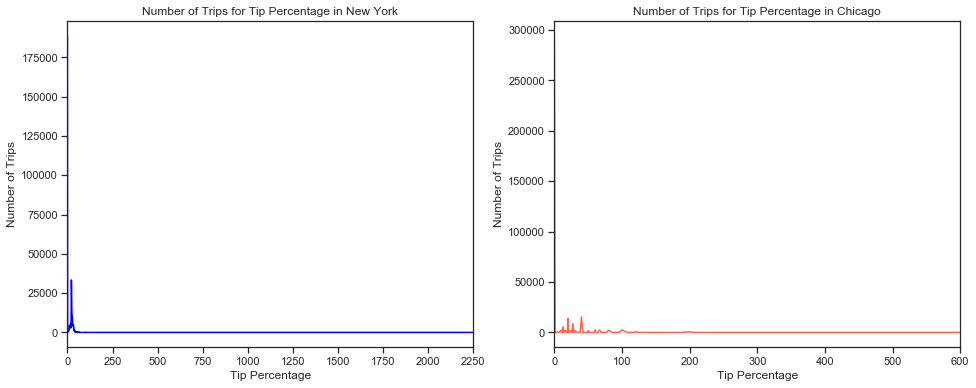

<Figure size 432x288 with 0 Axes>

In [13]:
## Visualise: how are tips (as a percentage of the fare) distributed?
pd.set_option('precision', 3)
colour = ['blue', 'tomato']
city_names = ['New York', 'Chicago']
# sns.set(style = "ticks")
fig, axes = plt.subplots(nrows=1, 
                         ncols=2,
                         figsize = (16,6))
for n in range(0,2):
    axx = axes[n]
    tips_perc[n].plot(kind = 'line',
                      x = tips_perc[n].index,
                      y = tips_perc[n].values, 
                      ax = axx, 
                      color = colour[n])
    axx.set(title = 'Number of Trips for Tip Percentage in '+ city_names[n],  
           xlabel = 'Tip Percentage', 
           ylabel = 'Number of Trips')
plt.show()
plt.savefig('number_trips_tips.png')

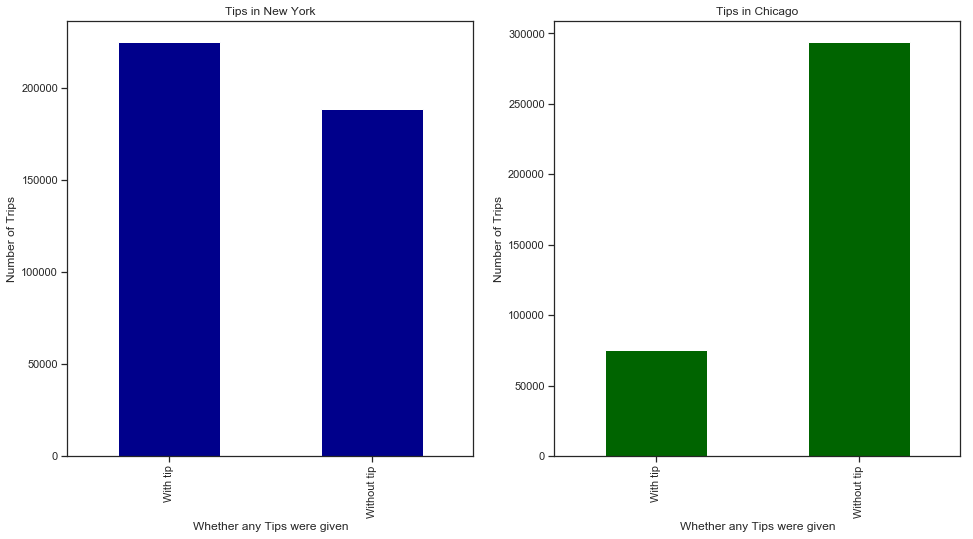

<Figure size 432x288 with 0 Axes>

In [20]:
pd.set_option('precision', 3)
colour = ['darkblue', 'darkgreen']
city_names = ['New York', 'Chicago']
sns.set(style = "ticks")
fig, axes = plt.subplots(nrows=1, 
                         ncols=2,
                         figsize = (16,8))
for n in range(0,2):
    tips_abs[n].plot(kind = 'bar',
                      x = tips_abs[n].index,
                      y = tips_abs[n].values, 
                      ax = axes[n], 
                      color = colour[n])
    axes[n].set(title = 'Tips in '+ city_names[n],  
           xlabel = 'Whether any Tips were given', 
           ylabel = 'Number of Trips')
plt.show()
plt.savefig('number_trips_tips.png')

### 2.1 Whether the tip amount increases with trip distance.

In [14]:
perc_dist_int = []
cat_dist_int = []
for n in range(0,2):
    perc_dist_df = cities_df[n].loc[:, ['tip_perc', 'dist_interval']]
    perc_dist_int.append(perc_dist_df)
    cat_dist_df = cities_df[n].loc[:, ['tip_cat_int', 'dist_interval']]
    cat_dist_int.append(cat_dist_df)

td_pivot_list = []
for n in range(0,2): 
    td_gb = cat_dist_int[n].groupby(['dist_interval','tip_cat_int'])
    td_gb.size()

    flatten_df = td_gb.size().reset_index()
    flatten_df.columns = ['dist_interval', 'tip_cat_int', 'number_trips']
    flatten_df

    td_pivot = pd.pivot_table(flatten_df, index=['dist_interval'], columns=['tip_cat_int'],
                                          values='number_trips', aggfunc=np.sum)
    td_pivot.reset_index(inplace=True)
    td_pivot.columns = ['Distance (Intervals)', 'With Tip', 'Without Tip']
    td_pivot_list.append(td_pivot)

# testing 
td_pivot_list[1]

,Distance (Intervals),With Tip,Without Tip
0,10.0,265109.0,67009.0
1,20.0,27134.0,7993.0
2,30.0,1711.0,497.0
3,40.0,106.0,41.0
4,50.0,9.0,2.0
5,60.0,5.0,3.0
6,70.0,3.0,NaN
7,80.0,1.0,NaN
8,100.0,1.0,2.0


In [29]:
# defining a function for repeated use
def stacked_chart(pivot_list, Gen_Title, X_label):
    city_names = ['New York', 'Chicago']
    fig, axes  = plt.subplots(nrows = 1, 
                          ncols = 2, 
                          figsize=(16,10))
    fig.subplots_adjust(hspace = 0.5, 
                   wspace = 0.3)
    for n in range(0,2):
        axx = axes[n]
        pivot_list[n][['With Tip', 'Without Tip']].plot(style = 'ticks', 
                                                          kind = 'bar',
                                                          stacked = True, 
                                                          ax = axx)
        axx.set(title = Gen_Title + city_names[n],
               xlabel = X_label,
               ylabel = 'Number of trips')

        plt.legend(loc = 'upper right', fontsize = 10)

No handles with labels found to put in legend.


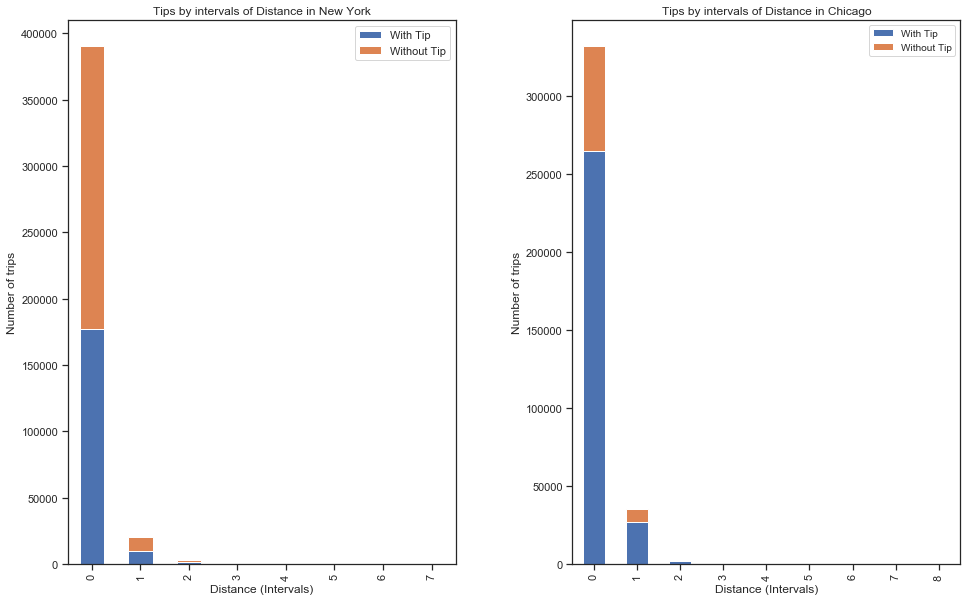

In [30]:
stacked_chart(td_pivot_list, 'Tips by intervals of Distance in ', 'Distance (Intervals)')

## SAVE FIGURE ## 
plt.savefig('Tips_by_dist_intervals.png')
plt.show()

In [214]:
tip_dist = [perc_dist_int, cat_dist_int]

In [34]:
#VISUALISATION 
def line_chart(pivot_list, X_col, X_label): 
    pd.set_option('precision', 1)
    sns.set(style = 'ticks')
    fig, axes = plt.subplots(nrows=1, 
                         ncols=2,
                         figsize = (16,8))
    for n in range(0,2):
        axx = axes[n]
        pivot_list[n].plot(kind = 'line',
                              x = X_col, 
                              y = ['With Tip', 'Without Tip'],
                                              ax = axx)
        axx.set(title = 'Tips in '+ city_names[n],  
               xlabel = X_label, 
               ylabel = 'Number of trips')

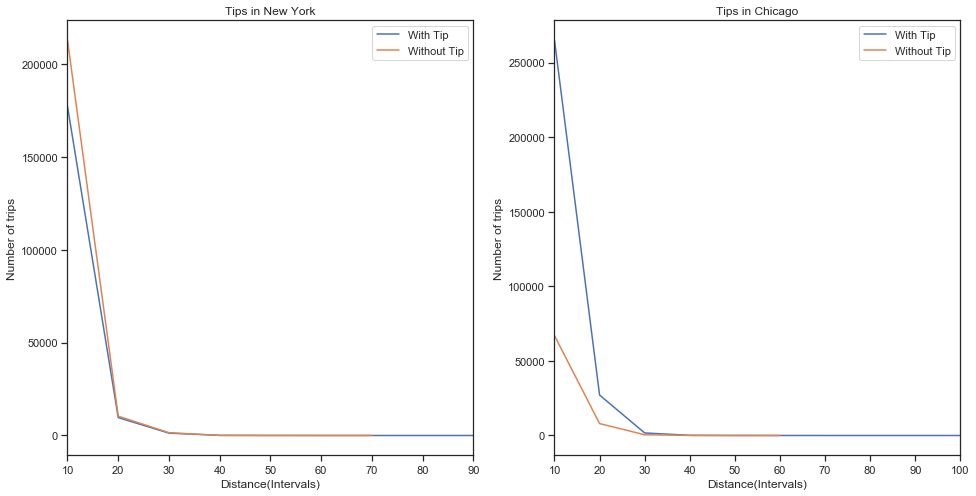

<Figure size 432x288 with 0 Axes>

In [35]:
      
line_chart(td_pivot_list, 'Distance (Intervals)', 'Distance(Intervals)')
plt.show()
plt.savefig('tips_distance.png')

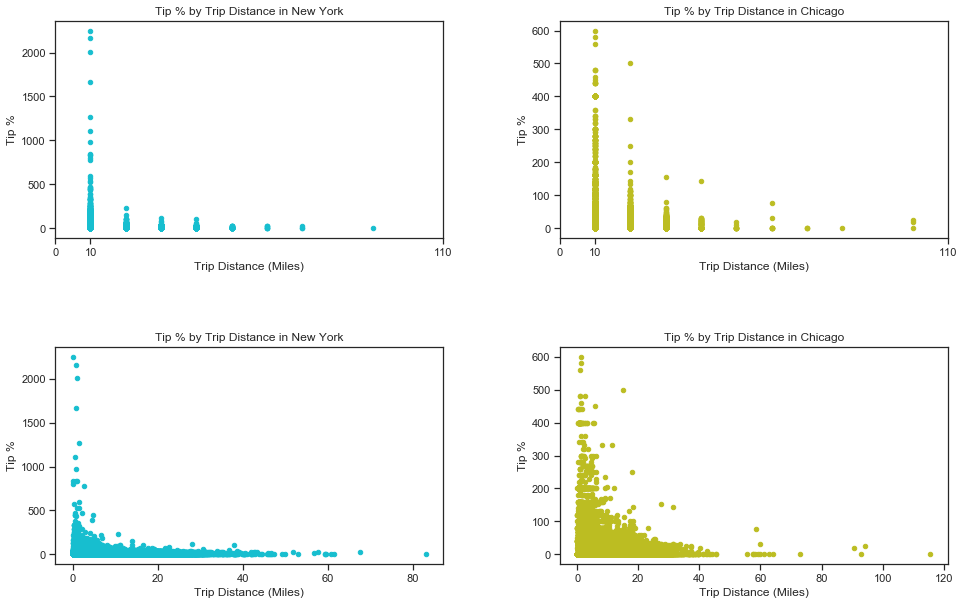

In [17]:
# tip % by trip distance
colours = ['tab:cyan', 'tab:olive']
fig, axes = plt.subplots(nrows = 2, 
                         ncols = 2,
                         figsize=(16,10))
fig.subplots_adjust(hspace = 0.5, 
                    wspace = 0.3)
for n in range(0,2):
    axx = axes[0][n]
    cities_df[n].plot(kind = 'scatter', 
                      x='dist_interval', 
                      y='tip_perc', 
                      ax=axx,
                     color = colours[n])
    axx.set(xlabel= 'Trip Distance (Miles)',
        ylabel='Tip %',
        title= 'Tip % by Trip Distance in '+ city_names[n],
           xticks = (0, 110, 10))
    axy = axes[1][n]
    cities_df[n].plot(kind = 'scatter', 
                      x='trip_distance', 
                      y='tip_perc', 
                      ax=axy,
                     color = colours[n])
    axy.set(xlabel= 'Trip Distance (Miles)',
        ylabel='Tip %',
        title= 'Tip % by Trip Distance in '+ city_names[n])
plt.show()
plt.savefig('tip_perc_dist_scatter.png')

### Applying linear regression to identify patterns

In [18]:
distance_regr = linear_model.LinearRegression()
for n in range(0,2):
    X = cities_df[n][['trip_distance']]
    y = cities_df[n][['tip_perc']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    distance_regr.fit(X_train, y_train)
    print('In ', city_names[n], ', ','Tip percentage = ', distance_regr.intercept_, '+', distance_regr.coef_, '* Distance')
    distance_regr.predict(y_test)
    fitted_values = distance_regr.predict(X_test)
    print('In the case of', city_names[n], ', r-squared value is: ', r2_score(y_test, fitted_values))

In  New York ,  Tip percentage =  [13.86346702] + [[-0.22549961]] * Distance
In the case of New York , r-squared value is:  0.0027033211137428292
In  Chicago ,  Tip percentage =  [8.96618828] + [[-0.37704069]] * Distance
In the case of Chicago , r-squared value is:  0.00664452194269316


### 2.2 Whether the tip amount differs based on the pick-up time.

In [25]:
perc_time_int = []
cat_time_int = []
for n in range(0,2):
    perc_time_df = cities_df[n].loc[:, ['tip_perc', 'time_group']]
    perc_time_int.append(perc_time_df)
    cat_time_df = cities_df[n].loc[:, ['tip_cat_int', 'time_group']]
    cat_time_int.append(cat_time_df)

tt_pivot_list = []
for n in range(0,2): 
    tt_gb = cat_time_int[n].groupby(['time_group', 'tip_cat_int'])
    tt_gb.size()

    flatten_df = tt_gb.size().reset_index()
    flatten_df.columns = ['time_group', 'tip_cat_int', 'number_trips']
    flatten_df

    tt_pivot = pd.pivot_table(flatten_df, index=['time_group'], columns=['tip_cat_int'],
                                          values='number_trips', aggfunc=np.sum)
    tt_pivot.reset_index(inplace=True)
    tt_pivot.columns = ['Time Group', 'With Tip', 'Without Tip']
    tt_pivot_list.append(tt_pivot)
tt_pivot_list[0].head()

,Time Group,With Tip,Without Tip
0,1.0,11060,10618
1,2.0,7697,8157
2,3.0,23393,28433
3,4.0,38321,43729
4,5.0,36077,40722


No handles with labels found to put in legend.


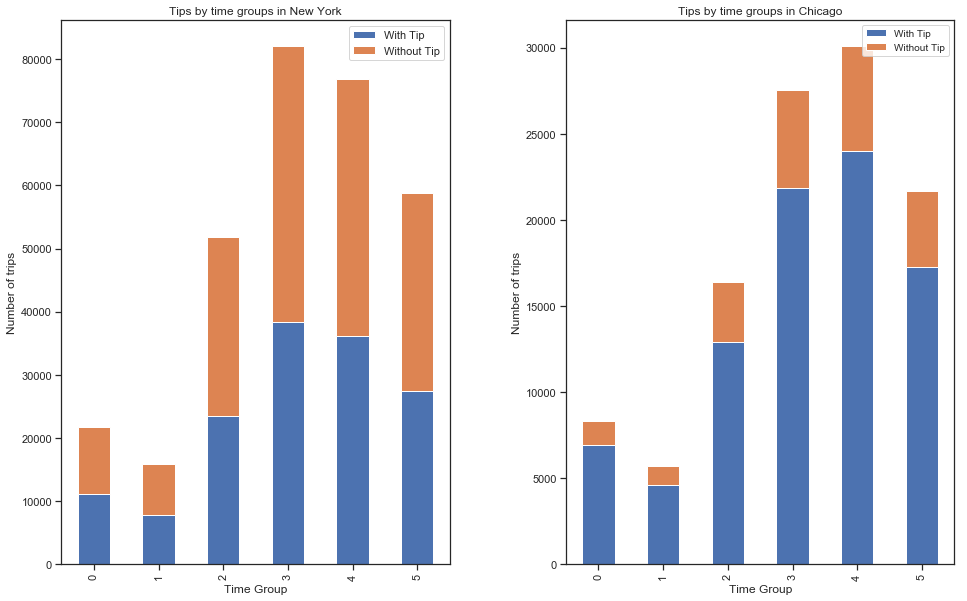

In [28]:
stacked_chart(tt_pivot_list, 'Tips by time groups in ', 'Time Group')
### SECTION 3 ###
## SAVE FIGURE ## 
plt.savefig('tip_time_group_stacked_chart.png')
plt.show()

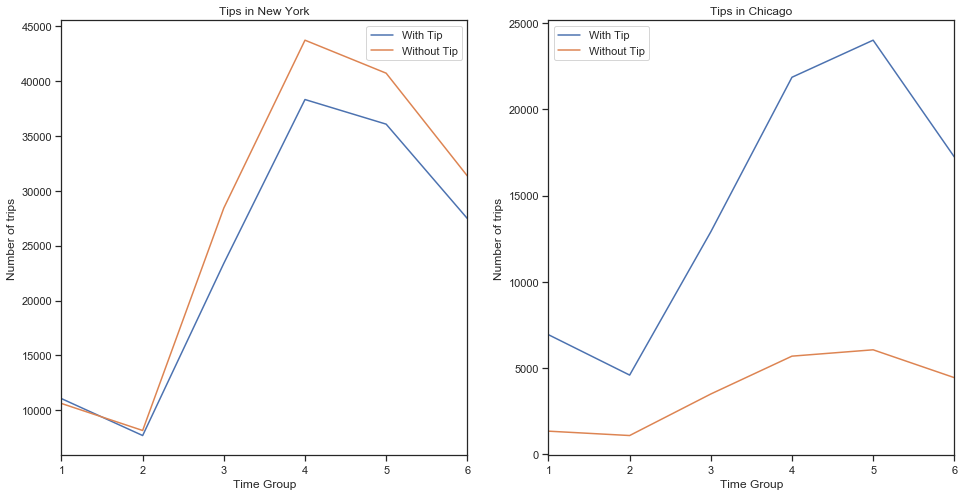

<Figure size 432x288 with 0 Axes>

In [36]:
line_chart(tt_pivot_list, 'Time Group', 'Time Group')
plt.show()
plt.savefig('tips_time_group_line.png')

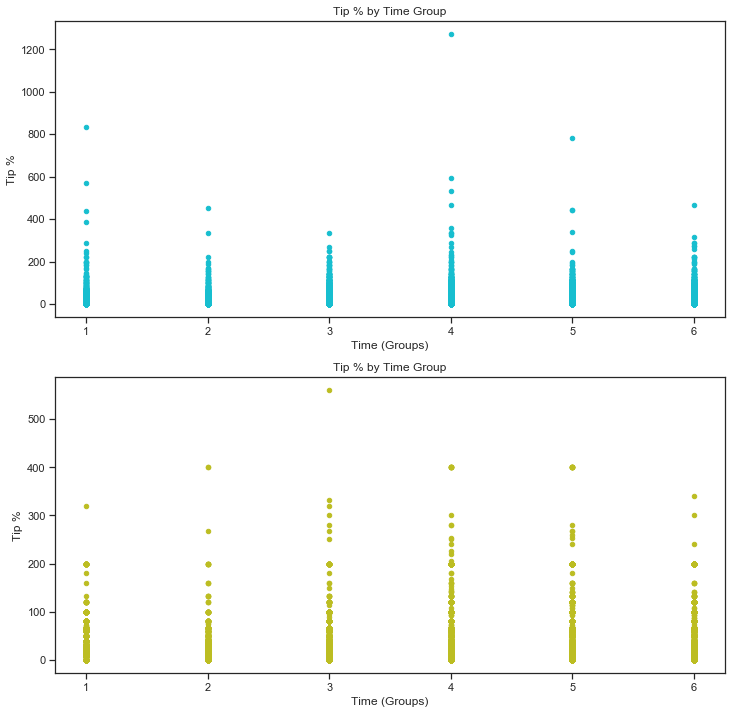

<Figure size 432x288 with 0 Axes>

In [45]:
colours = ['tab:cyan', 'tab:olive']
fig, axes = plt.subplots(nrows = 2, 
                         ncols = 1,
                         figsize=(12,12))
fig.subplots_adjust(hspace = 0.2, 
                    wspace = 0.3)
for n in range(0,2): 
    axx = axes[n]
    cities_df[n].plot(kind='scatter', 
                      x='time_group', 
                      y='tip_perc', 
                      ax=axx, 
                     color = colours[n])
    axx.set(xlabel= 'Time (Groups)',
        ylabel='Tip %',
        title= 'Tip % by Time Group')
    
plt.show()
plt.savefig('tips_time_group_scatter.png')

### 2.3 Whether people tip better on Christmas than on New Year's.

In [47]:
def trip_day_marker(x):
    if x == 'Christmas':
        return 0
    else:
        return 1
for item in cities_df:
    item['trip_day_int'] = item['trip_day'].apply(trip_day_marker)

In [53]:
ttd_pivot_list = []
for n in range(0,2): 
    tip_day = cities_df[n][['tip_category', 'trip_day_int']]
    ttd_groupby = tip_day.groupby(['trip_day_int','tip_category'])
    ttd_groupby.size()

    ttd_df = ttd_groupby.size().reset_index()
    ttd_df.columns = ['trip_day_int', 'tip_category', 'number_trips']
  
    ttd_pivot = pd.pivot_table(ttd_df, index=['trip_day_int'], columns=['tip_category'],
                                          values='number_trips', aggfunc=np.sum)
    ttd_pivot.reset_index(inplace=True)
    ttd_pivot.columns = ['Trip Day', 'With Tip', 'Without Tip']
    ttd_pivot
    ttd_pivot_list.append(ttd_pivot)


No handles with labels found to put in legend.


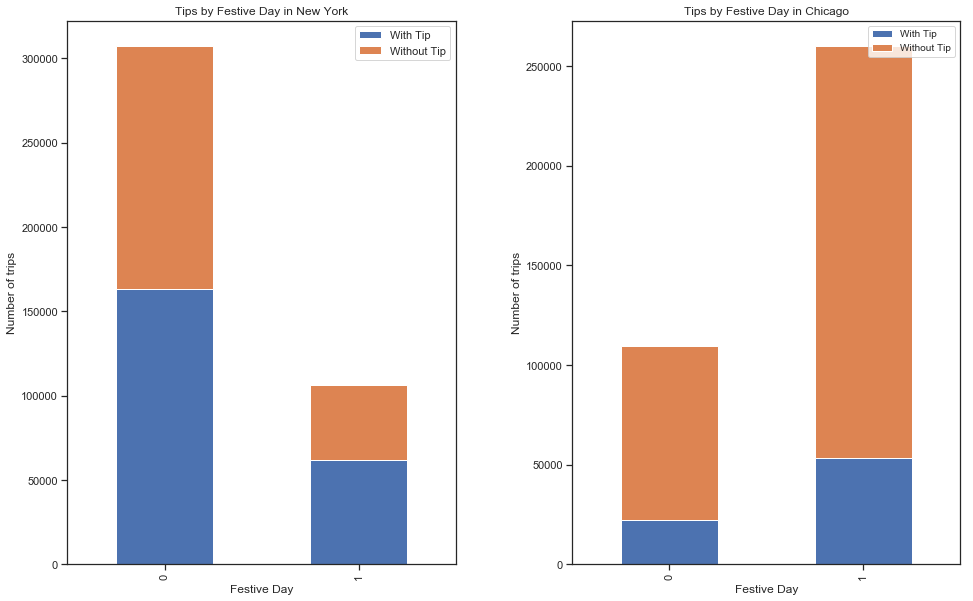

<Figure size 432x288 with 0 Axes>

In [54]:
# visualise 
stacked_chart(ttd_pivot_list, 'Tips by Festive Day in ', 'Festive Day')
plt.show()
plt.savefig('tips_festive_day_stacked.png')

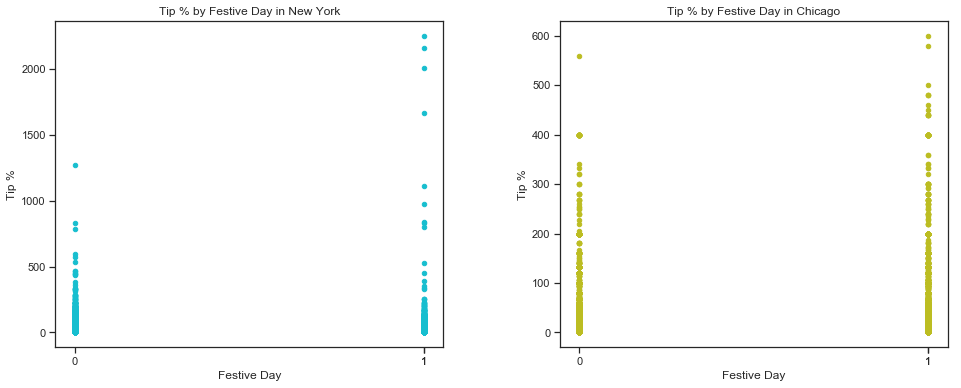

<Figure size 432x288 with 0 Axes>

In [69]:
colours = ['tab:cyan', 'tab:olive']
fig, axes = plt.subplots(nrows = 1, 
                         ncols = 2,
                         figsize=(16,6))
fig.subplots_adjust(hspace = 0.2, 
                    wspace = 0.3)
for n in range(0,2): 
    axx = axes[n]
    cities_df[n].plot(kind='scatter', 
                      x='trip_day_int', 
                      y='tip_perc', 
                      ax=axx, 
                     color = colours[n])
    axx.set(xlabel= 'Festive Day',
        ylabel='Tip %',
        title= 'Tip % by Festive Day in ' + city_names[n],
           xticks = (0,1,1))
    
plt.show()
plt.savefig('tips_festive_day_scatter.png')

## Insights

We uncovered THREE main insights:
- First, we were wrong in hypothesising that the longer the distance travelled, more likely that the tip (as a percent of the total fare)  would be higher. The data suggests that as the distance travelled increases, the percentage of tip decreases. This is consistent across both the cities. In terms of the generosity of tipping, it was noticeable that New York taxi riders tended to be more generous than Chicago riders in giving tips that constituted a larger percentage of the fare over short distances. 
- Second, tips (as a percent of the fare) in New York and Chicago tended to be higher between 4pm to midnight.
- Finally, as between New Year's and Christmas, the tips (as a percent of the fare) in both cities tended to be slightly higher on New Year's than on Christmas. Seems like the season of jolly did not quite turn into a season of generosity. (Perhaps people spent all the money on gifts with none to spare for the driver). 

<h4><b> Simple Linear Regression </b></h4>

In order to determine to what extent the distance travelled impacts the percentage of tip given to taxi drivers, a Simple Linear Regression was conducted for both datasets. The results are as follow:

(Chicago)Tip percentage =  [8.96618828] + [[-0.37704069]] * Distance
(R2=0.00664452194269316)
A "mile" increase in distance travelled is associated with a 0.37704069 "percentage" decrease in Tip.


(New York)Tip percentage =  [13.79339662] + [[-0.21699095]] * Distance
(R2=0.002399528026094222)
A "mile" increase in distance travelled is associated with a 0.21699095 "percentage" decrease in Tip.


## Evaluation 

<h4><b>Factors affecting tips relative to the fare amount</b></h4>
We were intrigued by some instances where the tips exceeded the fare amount in both Chicago and New York for trips of a short distance. It would be interesting to investigate the underlying factors that contribute to such generous tipping. 

<h4><b>Simple linear regression models</b></h4>
The coefficient of determination (𝑅2) for both the simple linear regression models suggest that the model might not be able to explain the variation of the output with different inputs. Further cross-validation could be done in order to obatin a more reliable model.